In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [63]:
csv_path = 'C:/Users/israe/OneDrive/Desktop/stage/cleaned_data2.csv'
dfp = pd.read_csv(csv_path)

In [64]:
dfp.head(2)

,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,DATECRE,CIVILITY,REGION,...,famille_Vehi,Gam_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,Qte,PRIXTTC,TypeFinancement,Couleur,CIVILITY_GROUP
0,31000822,Reid,Gregory,45122,OUARZAZATE,MAROC,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VP,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,1,340000.008,COMPTANT,"White pearl ""W54""",Companies and Organizations
1,31000822,Reid,Gregory,45122,OUARZAZATE,MAROC,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VP,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,1,340000.008,COMPTANT,"White pearl ""W54""",Companies and Organizations


In [65]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120395 entries, 0 to 120394
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CUSTNO           120395 non-null  int64  
 1   NAMECLT          120395 non-null  object 
 2   FIRSTNAME        120395 non-null  object 
 3   ZIP              120395 non-null  object 
 4   CITY             120395 non-null  object 
 5   COUNTRY          120395 non-null  object 
 6   PHONE            120395 non-null  object 
 7   DATECRE          120375 non-null  object 
 8   CIVILITY         120395 non-null  object 
 9   REGION           120395 non-null  object 
 10  GENDER           120395 non-null  object 
 11  IDFactMat        120395 non-null  int64  
 12  NomGroupe        120395 non-null  object 
 13  NomSociete       120395 non-null  object 
 14  NomSite          120395 non-null  object 
 15  DateFact         120395 non-null  object 
 16  NewOccas         120395 non-null  obje

In [66]:
# Count the number of missing (invalid) date values
print(dfp['DateFact'].isna().sum())  
# Display rows with invalid date values
print(dfp[dfp['DateFact'].isna()]) 

0
Empty DataFrame
Columns: [CUSTNO, NAMECLT, FIRSTNAME, ZIP, CITY, COUNTRY, PHONE, DATECRE, CIVILITY, REGION, GENDER, IDFactMat, NomGroupe, NomSociete, NomSite, DateFact, NewOccas, IdPropr, famille_Vehi, Gam_Vehi, Mrq_Vehi, Model_Vehi, OrgFinanc, Qte, PRIXTTC, TypeFinancement, Couleur, CIVILITY_GROUP]
Index: []

[0 rows x 28 columns]


In [67]:
dfp.duplicated().sum()


0

In [68]:
dfp.describe()

,CUSTNO,IDFactMat,IdPropr,Qte,PRIXTTC
count,1.203950e+05,120395.000000,1.203950e+05,120395.0,1.203950e+05
mean,1.927601e+07,141738.431438,1.927601e+07,1.0,2.197093e+05
std,2.333293e+07,84925.386468,2.333293e+07,0.0,1.507709e+05
min,1.000016e+06,58.000000,1.000016e+06,1.0,0.000000e+00
25%,1.004234e+06,64628.500000,1.004234e+06,1.0,1.610000e+05
50%,8.000551e+06,142694.000000,8.000551e+06,1.0,2.100000e+05
75%,3.700330e+07,218086.500000,3.700330e+07,1.0,2.570000e+05
max,8.900015e+07,284192.000000,8.900015e+07,1.0,2.244000e+07


In [69]:
(dfp.PRIXTTC == 0).sum()


6

In [70]:
dfp[(dfp.PRIXTTC == 0)]


,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,DATECRE,CIVILITY,REGION,...,famille_Vehi,Gam_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,Qte,PRIXTTC,TypeFinancement,Couleur,CIVILITY_GROUP
17376,8001967,Sanchez,Austin,20000,CASABLANCA,MAROC,(944)655-9785,2002-07-17,Companies and Organizations,Grand Casablanca,...,Equipements industriels,Inverseur normal secours,CUMMINS POWER GENERATION,GT40160YN72,NaN,1,0.0,NaN,GRISE,Other Categories
17377,8001967,Sanchez,Austin,20000,CASABLANCA,MAROC,(944)655-9785,2002-07-17,Companies and Organizations,Grand Casablanca,...,Equipements industriels,Inverseur normal secours,CUMMINS POWER GENERATION,GT40160YN72,NaN,1,0.0,NaN,GRISE,Other Categories
17378,8001967,Sanchez,Austin,20000,CASABLANCA,MAROC,(944)655-9785,2002-07-17,Companies and Organizations,Grand Casablanca,...,Equipements industriels,Inverseur normal secours,CUMMINS POWER GENERATION,GT40250YN72,NaN,1,0.0,NaN,GRISE,Other Categories
17379,8001967,Sanchez,Austin,20000,CASABLANCA,MAROC,(944)655-9785,2002-07-17,Companies and Organizations,Grand Casablanca,...,Equipements industriels,Inverseur normal secours,CUMMINS POWER GENERATION,GT40350YN72,NaN,1,0.0,NaN,GRISE,Other Categories
58054,53001275,Rivers,Vincent,.,RABAT,MAROC,(501)440-0972x710,2018-05-30,SociÃ©tÃ©,Rabat - SalÃ© - Zemmour - Zaer,...,VUL,MINI PICK UP,DFSK,SUPER CAB,NaN,1,0.0,NaN,BLANC,Companies and Organizations
81253,10000034,Horton,Taylor,20000,CASABLANCA,MAROC,749-441-5771,2012-02-15,STE,Grand Casablanca,...,VP,LUDOSPACE,OPEL,COMBO LIFE,NaN,1,0.0,Crédit,Blanc Jade G2O,Companies and Organizations


In [71]:
dfp['DateFact'] = pd.to_datetime(dfp['DateFact'], errors='coerce')
dfp['DateFact']

0        2018-02-23
1        2018-02-23
2        2018-04-27
3        2018-11-23
4        2020-02-28
            ...    
120390   2018-07-11
120391   2018-03-09
120392   2018-03-09
120393   2018-03-09
120394   2020-08-19
Name: DateFact, Length: 120395, dtype: datetime64[ns]

In [72]:
dfp['DateFact'].dtype

dtype('<M8[ns]')

In [73]:
dfp.columns

Index(['CUSTNO', 'NAMECLT', 'FIRSTNAME', 'ZIP', 'CITY', 'COUNTRY', 'PHONE',
       'DATECRE', 'CIVILITY', 'REGION', 'GENDER', 'IDFactMat', 'NomGroupe',
       'NomSociete', 'NomSite', 'DateFact', 'NewOccas', 'IdPropr',
       'famille_Vehi', 'Gam_Vehi', 'Mrq_Vehi', 'Model_Vehi', 'OrgFinanc',
       'Qte', 'PRIXTTC', 'TypeFinancement', 'Couleur', 'CIVILITY_GROUP'],
      dtype='object')

In [74]:
columns_to_keep = ['CUSTNO','IDFactMat','DateFact', 'PRIXTTC','CITY','NewOccas','famille_Vehi','Gam_Vehi','Mrq_Vehi','Couleur','TypeFinancement']

# Create a new DataFrame containing only the desired columns
subset_df = dfp[columns_to_keep].copy()

# Display the new subset DataFrame
subset_df

,CUSTNO,IDFactMat,DateFact,PRIXTTC,CITY,NewOccas,famille_Vehi,Gam_Vehi,Mrq_Vehi,Couleur,TypeFinancement
0,31000822,5726,2018-02-23,340000.008,OUARZAZATE,Neuf,VP,SUV (4x4),MITSUBISHI,"White pearl ""W54""",COMPTANT
1,31000822,5727,2018-02-23,340000.008,OUARZAZATE,Neuf,VP,SUV (4x4),MITSUBISHI,"White pearl ""W54""",COMPTANT
2,31000822,14344,2018-04-27,294999.996,OUARZAZATE,Neuf,VUL,PICK UP,MITSUBISHI,"White pearl ""W54""",COMPTANT
3,40000455,39533,2018-11-23,164000.004,BERKANE,Neuf,VP,CITADINES,FORD,CHROME COPPER,Crédit Classique
4,12015740,106877,2020-02-28,229000.008,UNKNOWN,Neuf,VP,SUV (4x4),OPEL,Blanc glacier GAZ,COMPTANT
...,...,...,...,...,...,...,...,...,...,...,...
120390,32005024,24091,2018-07-11,89000.004,LAAYOUNE,Neuf,VUL,MINI PICK UP,DFSK,NaN,Crédit Classique
120391,26000776,7528,2018-03-09,190700.000,SAFI,Neuf,VUL,PICK UP,MITSUBISHI,Titanium Gray,Crédit Classique
120392,26000776,7533,2018-03-09,495000.000,SAFI,Neuf,Poids lourds FUSO,14T à 15T,MITSUBISHI FUSO,Z2835 - Blanc Mitsubishi,Crédit Classique
120393,26000776,7557,2018-03-09,204000.000,SAFI,Neuf,VUL,PICK UP,MITSUBISHI,Titanium Gray,Crédit Classique


# Missing Values

In [75]:
subset_df.isna().sum()

CUSTNO                 0
IDFactMat              0
DateFact               0
PRIXTTC                0
CITY                   0
NewOccas               0
famille_Vehi          16
Gam_Vehi              16
Mrq_Vehi               0
Couleur             8563
TypeFinancement    32148
dtype: int64

In [76]:
mv=subset_df.isna().mean()*100
mv

CUSTNO              0.000000
IDFactMat           0.000000
DateFact            0.000000
PRIXTTC             0.000000
CITY                0.000000
NewOccas            0.000000
famille_Vehi        0.013290
Gam_Vehi            0.013290
Mrq_Vehi            0.000000
Couleur             7.112422
TypeFinancement    26.702106
dtype: float64

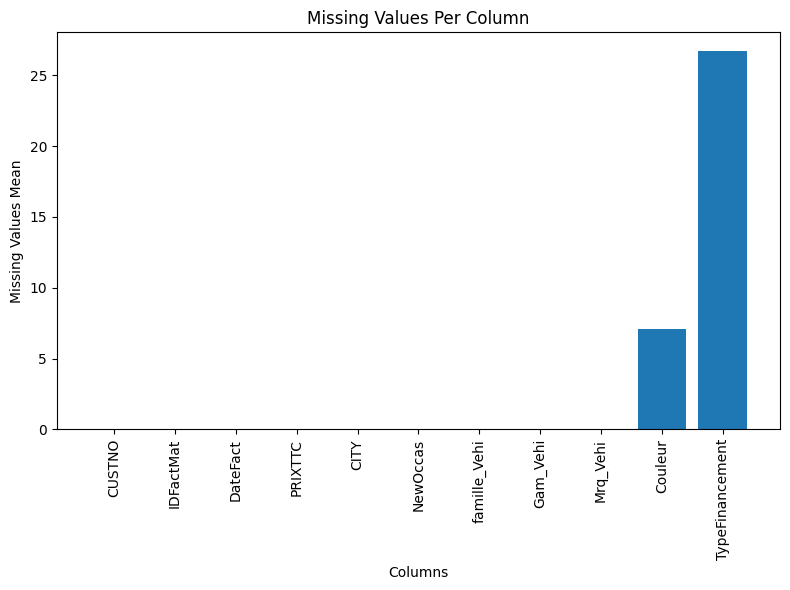

In [77]:
plt.figure(figsize=(8,6))

plt.bar(mv.index,mv.values)
plt.xlabel('Columns')
plt.ylabel('Missing Values Mean')
plt.title('Missing Values Per Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Filling the missing values with "UNKNOWN"

In [78]:
# Fill missing values in the "TypeFinancement" column with "UNKNOWN"

subset_df['TypeFinancement'].fillna('UNKNOWN', inplace=True)

# Fill missing values in the "famille_Vehi" column with "UNKNOWN"
subset_df['famille_Vehi'].fillna('UNKNOWN', inplace=True)

# Fill missing values in the "Gam_Vehi" column with "UNKNOWN"
subset_df['Gam_Vehi'].fillna('UNKNOWN', inplace=True)

# Fill missing values in the "Couleur" column with "UNKNOWN"
subset_df['Couleur'].fillna('UNKNOWN', inplace=True)

In [79]:
mv1=subset_df.isna().mean()*100
mv1

CUSTNO             0.0
IDFactMat          0.0
DateFact           0.0
PRIXTTC            0.0
CITY               0.0
NewOccas           0.0
famille_Vehi       0.0
Gam_Vehi           0.0
Mrq_Vehi           0.0
Couleur            0.0
TypeFinancement    0.0
dtype: float64

# NewOccas EXPLORATORY

In [80]:
value_count=subset_df['NewOccas'].value_counts()
value_count

NewOccas
Neuf        114725
Occasion      5670
Name: count, dtype: int64

In [81]:
percentage = subset_df['NewOccas'].value_counts(normalize=True) * 100

percentage

NewOccas
Neuf        95.290502
Occasion     4.709498
Name: proportion, dtype: float64

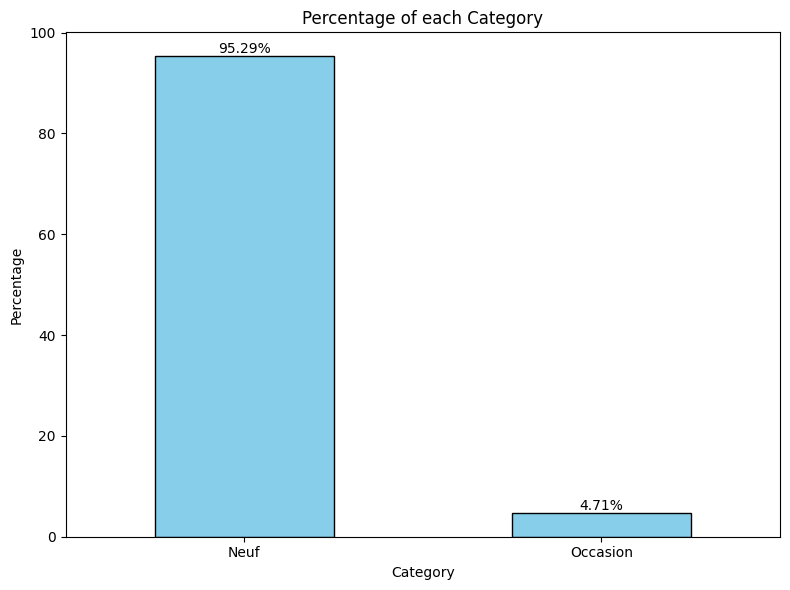

In [82]:
plt.figure(figsize=(8, 6))
ax = percentage.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of each Category')
plt.xticks(rotation=0)
plt.tight_layout()

# Adding percentage values on top of the bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()


# famille_Vehi ,Gam_Vehi , Mrq_Vehi  BY CATEGORY

Most frequent famille_Vehi,gam_Vehi and Mrq_Vehi in each category

In [88]:
new_df = subset_df[subset_df['NewOccas'] == 'Neuf']
new_df

most_frequent_new = new_df[['famille_Vehi', 'Gam_Vehi', 'Mrq_Vehi','PRIXTTC']].mode().iloc[0]
print("The most frequent one is :")
most_frequent_new


The most frequent one is :


famille_Vehi            VP
Gam_Vehi         SUV (4x4)
Mrq_Vehi              FORD
PRIXTTC         239000.004
Name: 0, dtype: object

In [89]:
new_df2 = subset_df[subset_df['NewOccas'] == 'Occasion']
new_df2

most_frequent_occasion = new_df2[['famille_Vehi', 'Gam_Vehi', 'Mrq_Vehi','PRIXTTC']].mode().iloc[0]
print("The most frequent one is :")
most_frequent_occasion

The most frequent one is :


famille_Vehi           VP
Gam_Vehi        CITADINES
Mrq_Vehi             FORD
PRIXTTC          120000.0
Name: 0, dtype: object

In [ ]:
new_df = subset_df[subset_df['NewOccas'] == 'Neuf']

# Get the unique values of the specified columns for the "New" category
unique_famille_Vehi = new_df['famille_Vehi'].unique()
unique_Gam_Vehi = new_df['Gam_Vehi'].unique()
unique_Mrq_Vehi = new_df['Mrq_Vehi'].unique()


unique_PRIXTTC = new_df['PRIXTTC'].unique()

# Print the unique values for each column
print("Unique 'famille_Vehi' values for 'Neuf' category:", unique_famille_Vehi)
print("**********************************************************************")
print("Unique 'Gam_Vehi' values for 'Neuf' category:", unique_Gam_Vehi)
print("**********************************************************************")
print("Unique 'Mrq_Vehi' values for 'Neuf' category:", unique_Mrq_Vehi)
print("**********************************************************************")
print("Unique 'PRIXTTC' values for 'Neuf' category:", unique_PRIXTTC)

Unique 'famille_Vehi' values for 'Neuf' category: ['VP' 'VUL' 'Tracteurs' 'Poids lourds' 'Poids lourds FUSO' 'Manutention'
 'Equipements industriels' 'Matériels travaux publics'
 'Divers Matériel TP' 'Moteurs diesel' 'Materiel travaux publics'
 'Véhicule électrique' 'UNKNOWN' 'EQUIPEMENT INDUSTRIEL' 'Matériels mines'
 'FIAT' 'Matériels de récolte' 'SCOOTER' 'MOTO' 'AUTOCAR'
 'Matériels travail du sol']
**********************************************************************
Unique 'Gam_Vehi' values for 'Neuf' category: ['SUV (4x4)' 'PICK UP' 'CITADINES' 'MINI PICK UP' 'COMPACTE'
 'Tracteurs à roues' 'LUDOSPACE' 'FOURGON' '3,5 T' 'VAN' '14T à 15T'
 '19T à 26T' '3,5T à 7,9T' '16T à 18,9T' 'MPV (monospace)' 'Grue'
 'ACCESSOIRES GE' 'Pilonneuses' 'Plaque vibrante' 'Rouleaux duplex'
 'Inverseur normal secours' 'GODET' 'Moteurs mat. constru. et mines'
 'Groupes électrogènes' 'Brise roche' 'Bulldozers' 'Mini-chargeuses'
 'Tracto-pelles' 'Compacteurs' '8T à 13T' 'FOTON' 'ROUTIERE' '40T' '32T'
 '

famille_Vehi by CATEGORY

In [ ]:
new_df = subset_df[subset_df['NewOccas'] == 'Neuf']

# Count the occurrences of each unique value in 'famille_Vehi'
famille_counts = new_df['famille_Vehi'].value_counts()
famille_counts

famille_Vehi
VP                           69655
VUL                          34224
Poids lourds FUSO             8041
Tracteurs                     1583
Poids lourds                   781
Matériels travaux publics      130
MOTO                            91
Equipements industriels         65
Véhicule électrique             62
SCOOTER                         24
FIAT                            10
UNKNOWN                         10
Manutention                      9
Materiel travaux publics         8
EQUIPEMENT INDUSTRIEL            8
Matériels de récolte             6
Divers Matériel TP               6
Moteurs diesel                   5
Matériels mines                  3
AUTOCAR                          3
Matériels travail du sol         1
Name: count, dtype: int64

In [ ]:
total_count = famille_counts.sum()
famille_percentages = (famille_counts / total_count) * 100
famille_percentages

famille_Vehi
VP                           60.714753
VUL                          29.831336
Poids lourds FUSO             7.008934
Tracteurs                     1.379821
Poids lourds                  0.680758
Matériels travaux publics     0.113314
MOTO                          0.079320
Equipements industriels       0.056657
Véhicule électrique           0.054042
SCOOTER                       0.020920
FIAT                          0.008716
UNKNOWN                       0.008716
Manutention                   0.007845
Materiel travaux publics      0.006973
EQUIPEMENT INDUSTRIEL         0.006973
Matériels de récolte          0.005230
Divers Matériel TP            0.005230
Moteurs diesel                0.004358
Matériels mines               0.002615
AUTOCAR                       0.002615
Matériels travail du sol      0.000872
Name: count, dtype: float64

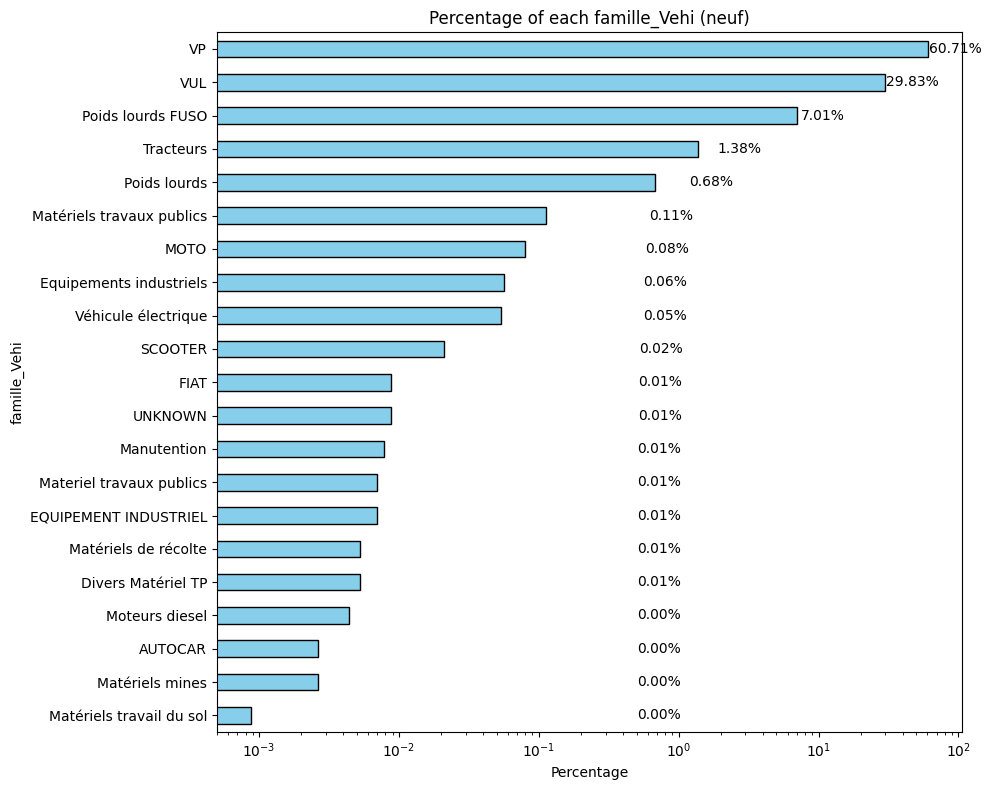

In [92]:
plt.figure(figsize=(10, 8))
ax = famille_percentages.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('famille_Vehi')
plt.title('Percentage of each famille_Vehi (neuf)')
plt.xscale('log')  # Set the x-axis scale to logarithmic

# Annotate each bar with its corresponding percentage
for i, v in enumerate(famille_percentages.sort_values()):
    ax.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

In [ ]:
new_df1 = subset_df[subset_df['NewOccas'] == 'Occasion']

# Count the occurrences of each unique value in 'famille_Vehi'
famille_counts1 = new_df1['famille_Vehi'].value_counts()
famille_counts1

famille_Vehi
VP                           4902
VUL                           529
Acoustique                    130
Divers agricole                71
Tracteurs                      11
Poids lourds FUSO               9
UNKNOWN                         6
Matériels travaux publics       5
Poids lourds                    4
FIAT                            3
Name: count, dtype: int64

In [ ]:
total_count1 = famille_counts1.sum()
famille_percentages1 = (famille_counts1 / total_count1) * 100
famille_percentages1

famille_Vehi
VP                           86.455026
VUL                           9.329806
Acoustique                    2.292769
Divers agricole               1.252205
Tracteurs                     0.194004
Poids lourds FUSO             0.158730
UNKNOWN                       0.105820
Matériels travaux publics     0.088183
Poids lourds                  0.070547
FIAT                          0.052910
Name: count, dtype: float64

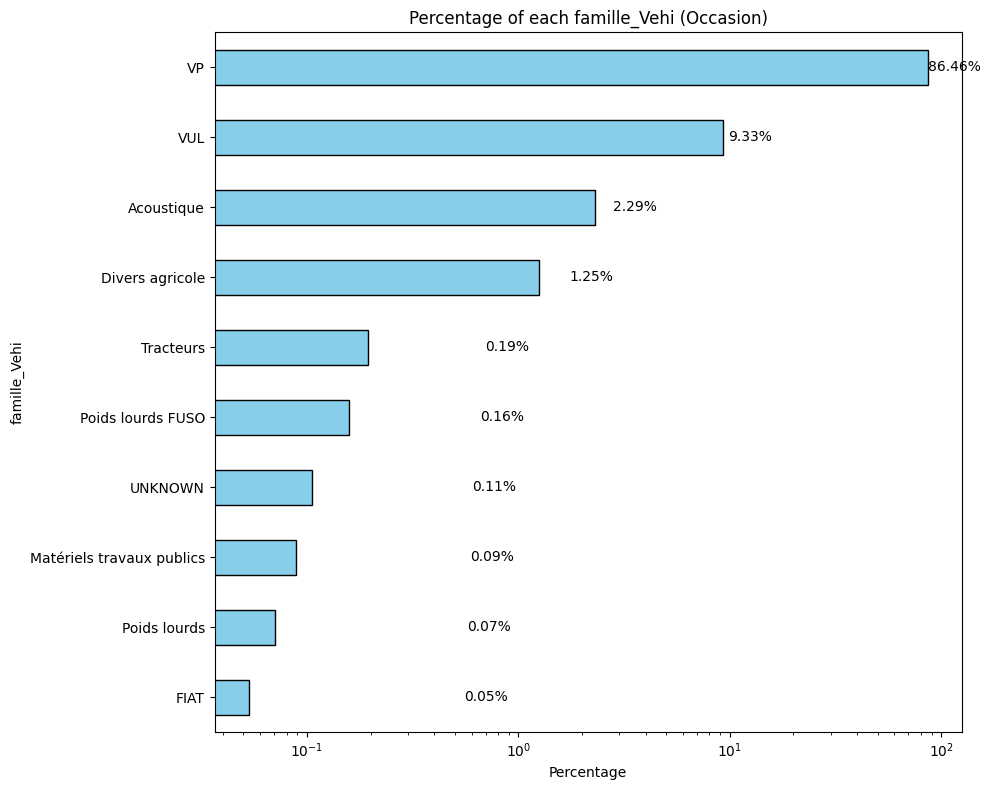

In [91]:
plt.figure(figsize=(10, 8))
ax = famille_percentages1.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('famille_Vehi')
plt.title('Percentage of each famille_Vehi (Occasion)')
plt.xscale('log')  # Set the x-axis scale to logarithmic

# Annotate each bar with its corresponding percentage
for i, v in enumerate(famille_percentages1.sort_values()):
    ax.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

Min , MAX , Mean PRIXTTC BY CATEGORY

In [ ]:
grouped = subset_df.groupby('NewOccas')['PRIXTTC']

# Calculate the minimum, maximum, and mean values for each category
min_values = grouped.min()
max_values = grouped.max()
mean_values = grouped.mean()

# Create a DataFrame to store the results
category_stats_df = pd.DataFrame({
    'Minimum_PRIXTTC': min_values,
    'Maximum_PRIXTTC': max_values,
    'Mean_PRIXTTC': mean_values
})

# Display the resulting DataFrame
category_stats_df

,Minimum_PRIXTTC,Maximum_PRIXTTC,Mean_PRIXTTC
NewOccas,,,
Neuf,0.0,22440000.0,223675.079979
Occasion,1800.0,901921.0,139466.912950


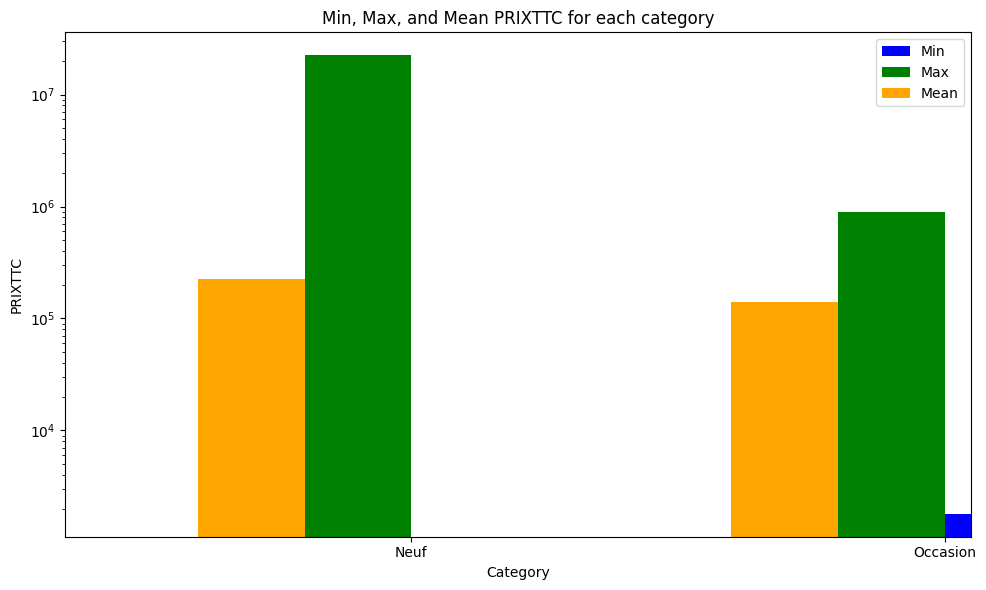

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot minimum values
min_values.plot(kind='bar', color='blue', position=0, width=0.2, label='Min')

# Plot maximum values
max_values.plot(kind='bar', color='green', position=1, width=0.2, label='Max')

# Plot mean values
mean_values.plot(kind='bar', color='orange', position=2, width=0.2, label='Mean')

# Set labels and title
ax.set_xlabel('Category')
ax.set_ylabel('PRIXTTC')
ax.set_title('Min, Max, and Mean PRIXTTC for each category')
ax.set_xticklabels(min_values.index, rotation=0)
ax.legend()

# Set y-axis to log scale
ax.set_yscale('log')

# Add color key legend
ax.annotate('Min', xy=(0.5, 0.9), xytext=(0.5, 0.95), color='blue', arrowprops=dict(facecolor='blue'))
ax.annotate('Max', xy=(1.5, 0.9), xytext=(1.5, 0.95), color='green', arrowprops=dict(facecolor='green'))
ax.annotate('Mean', xy=(2.5, 0.9), xytext=(2.5, 0.95), color='orange', arrowprops=dict(facecolor='orange'))

plt.tight_layout()
plt.show()


Min, Max, Mean PRIXTTC BY CITY

In [ ]:
grouped = subset_df.groupby('CITY')['PRIXTTC']
min_values_city = grouped.min()
max_values_city = grouped.max()
mean_values_city = grouped.mean()

# Create a DataFrame to store the results
city_stats_df = pd.DataFrame({
    'Minimum_PRIXTTC': min_values_city,
    'Maximum_PRIXTTC': max_values_city,
    'Mean_PRIXTTC': mean_values_city
})

# Display the resulting DataFrame
city_stats_df

,Minimum_PRIXTTC,Maximum_PRIXTTC,Mean_PRIXTTC
CITY,,,
ABU DHABI,264423.996,264423.996,264423.996000
AFRIQUE DE SUD,130000.000,130000.000,130000.000000
AGADIR,72500.000,778908.000,226137.285876
AGHBALA,87500.004,274594.992,221018.999200
AHFIR,74166.670,425600.000,172904.062155
...,...,...,...
YOUSSOUFIA,99000.000,581667.070,206666.072849
ZAGOURA,83000.004,900798.804,245991.420033
ZAIO,83000.000,520833.000,182724.034977


In [104]:
sorted_city_stats_df = city_stats_df.sort_values(by='Mean_PRIXTTC', ascending=True)
sorted_city_stats_df

,Minimum_PRIXTTC,Maximum_PRIXTTC,Mean_PRIXTTC
CITY,,,
COTE D'IVOIRE,85000.000,8.500000e+04,85000.000000
CDT AMEUR,90000.000,9.000000e+04,90000.000000
JOINVILLE LE PONT,93000.000,9.300000e+04,93000.000000
ARUIT,93999.996,9.400000e+04,93999.996000
INCHADEN,94395.000,9.439500e+04,94395.000000
...,...,...,...
MIRLEFT,416645.004,4.166450e+05,416645.004000
MEDIOUNA,170000.000,5.989080e+05,426436.144571
Chartres,591495.000,5.914950e+05,591495.000000


Most frequent famille_Vehi, Gam_Vehi, Mrq_Vehi , Model_Vehi By CITY

In [ ]:
# Group by 'CITY' and calculate the mode for each column
grouped_by_city = dfp.groupby('CITY')[['famille_Vehi', 'Gam_Vehi', 'Mrq_Vehi', 'Model_Vehi']].apply(lambda x: x.mode().iloc[0])

# Display the result
grouped_by_city


,famille_Vehi,Gam_Vehi,Mrq_Vehi,Model_Vehi
CITY,,,,
ABU DHABI,VP,SUV (4x4),FORD,KUGA
AFRIQUE DE SUD,VP,CITADINES,NISSAN,MICRA
AGADIR,VP,SUV (4x4),FORD,TRANSIT
AGHBALA,Tracteurs,Tracteurs à roues,NEWHOLLAND,TRACTEUR TD80 4RM
AHFIR,VP,CITADINES,OPEL,FIESTA
...,...,...,...,...
YOUSSOUFIA,VUL,PICK UP,MITSUBISHI,L200
ZAGOURA,VUL,SUV (4x4),FORD,L200
ZAIO,VP,CITADINES,OPEL,K01


Gam_Vehi By CATEGORY

In [ ]:
new_df2 = subset_df[subset_df['NewOccas'] == 'Neuf']
# Count the occurrences of each unique value in 'famille_Vehi'
gam_counts = new_df2['Gam_Vehi'].value_counts()
gam_counts

Gam_Vehi
SUV (4x4)                         37960
CITADINES                         20757
MINI PICK UP                      12015
VAN                               11141
PICK UP                            9421
COMPACTE                           6972
3,5T à 7,9T                        5009
LUDOSPACE                          2942
Tracteurs à roues                  1583
16T à 18,9T                        1401
14T à 15T                          1056
FOURGON                             955
3,5 T                               781
ROUTIERE                            488
MPV (monospace)                     483
FOTON                               444
MINI BUS                            248
40T                                 194
19T à 26T                           186
8T à 13T                            139
Tracto-pelles                       101
150CM3                               88
SUV                                  59
32T                                  56
Groupes électrogènes           

In [ ]:
total_count2 = gam_counts.sum()
gam_percentages1 = (gam_counts / total_count2) * 100
gam_percentages1

Gam_Vehi
SUV (4x4)                         33.087819
CITADINES                         18.092831
MINI PICK UP                      10.472870
VAN                                9.711048
PICK UP                            8.211811
COMPACTE                           6.077141
3,5T à 7,9T                        4.366093
LUDOSPACE                          2.564393
Tracteurs à roues                  1.379821
16T à 18,9T                        1.221181
14T à 15T                          0.920462
FOURGON                            0.832425
3,5 T                              0.680758
ROUTIERE                           0.425365
MPV (monospace)                    0.421007
FOTON                              0.387012
MINI BUS                           0.216169
40T                                0.169100
19T à 26T                          0.162127
8T à 13T                           0.121159
Tracto-pelles                      0.088037
150CM3                             0.076705
SUV                    

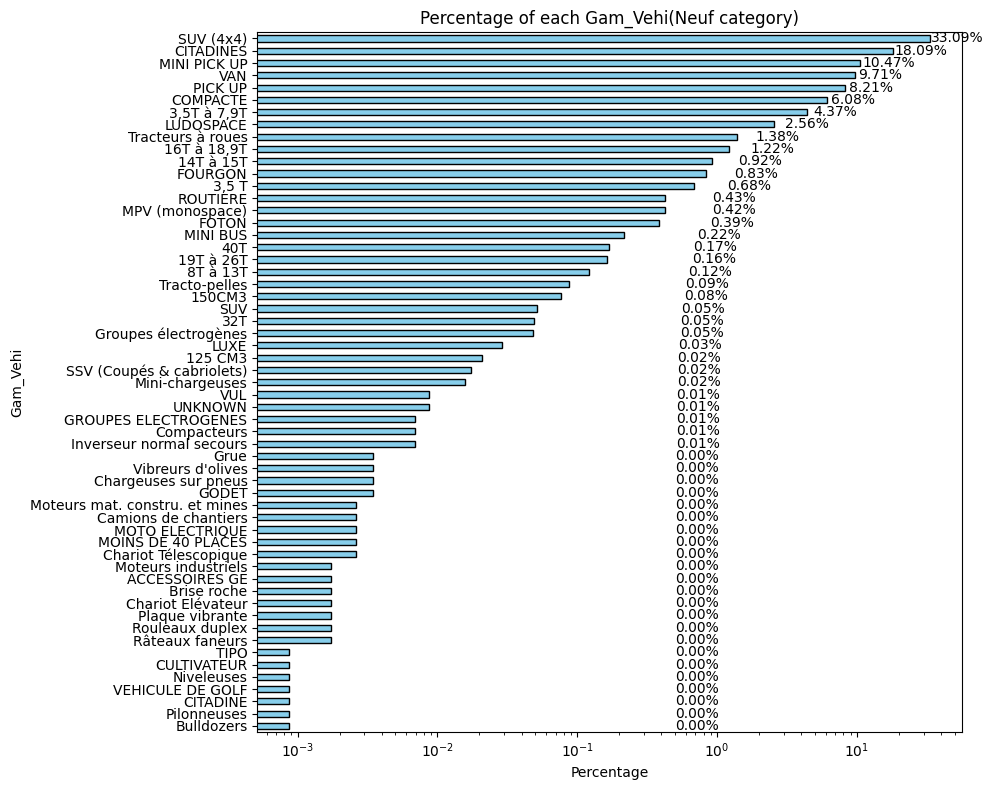

In [96]:
plt.figure(figsize=(10, 8))
ax = gam_percentages1.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Gam_Vehi')
plt.title('Percentage of each Gam_Vehi(Neuf category)')
plt.xscale('log')  # Set the x-axis scale to logarithmic

# Annotate each bar with its corresponding percentage
for i, v in enumerate(gam_percentages1.sort_values()):
    ax.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

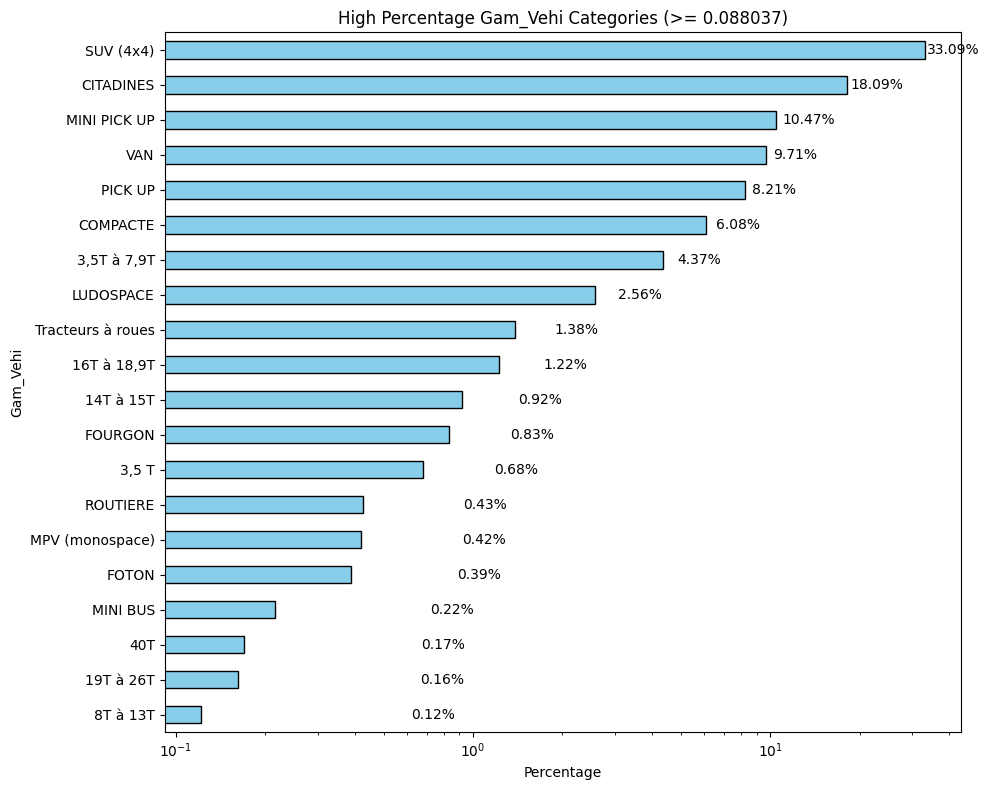

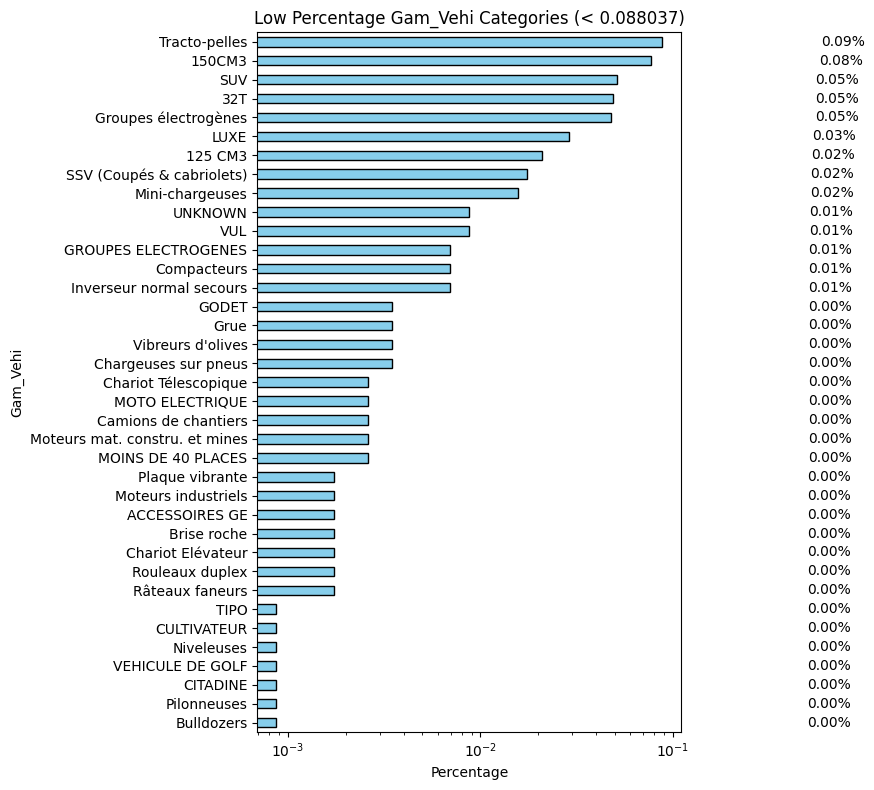

In [ ]:
# Define the threshold for splitting the categories
threshold = 0.088037

# Filter categories based on the threshold
high_percentage_categories = gam_percentages1[gam_percentages1 >= threshold]
low_percentage_categories = gam_percentages1[gam_percentages1 < threshold]

# Plotting the high percentage categories
plt.figure(figsize=(10, 8))
ax1 = high_percentage_categories.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Gam_Vehi')
plt.title('High Percentage Gam_Vehi Categories (>= 0.088037)')
plt.xscale('log')  # Set the x-axis scale to logarithmic

# Annotate each bar with its corresponding percentage
for i, v in enumerate(high_percentage_categories.sort_values()):
    ax1.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

# Plotting the low percentage categories
plt.figure(figsize=(10, 8))
ax2 = low_percentage_categories.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Gam_Vehi')
plt.title('Low Percentage Gam_Vehi Categories (< 0.088037)')
plt.xscale('log')  # Set the x-axis scale to logarithmic

# Annotate each bar with its corresponding percentage
for i, v in enumerate(low_percentage_categories.sort_values()):
    ax2.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

In [93]:
new_df4 = subset_df[subset_df['NewOccas'] == 'Occasion']
# Count the occurrences of each unique value in 'famille_Vehi'
gam_counts1 = new_df4['Gam_Vehi'].value_counts()
gam_counts1

Gam_Vehi
CITADINES                    2072
SUV (4x4)                    1873
COMPACTE                      548
VAN                           302
ROUTIERE                      135
Baffles acoustique            130
PICK UP                       103
MPV (monospace)                74
Chargeurs                      71
LUDOSPACE                      57
FOURGON                        47
LUXE                           46
CHASSIS-CABINE                 45
2005                           42
MOYENNES SUPERIEURES           31
MINI PICK UP                   21
MOYENNES INFERIEURES           14
Tracteurs à roues              11
MINI BUS                       11
MONOSPACE                       9
UNKNOWN                         6
Chargeuses sur pneus            5
8T à 13T                        4
40T                             3
3,5 T                           3
VUL                             3
32T                             2
14T à 15T                       1
SSV (Coupés & cabriolets)       1
Name:

In [94]:
total_counts = gam_counts.sum()
gam_percentagess = (gam_counts1 / total_counts) * 100
gam_percentagess

Gam_Vehi
CITADINES                    1.806058
SUV (4x4)                    1.632600
COMPACTE                     0.477664
VAN                          0.263238
ROUTIERE                     0.117673
Baffles acoustique           0.113314
PICK UP                      0.089780
MPV (monospace)              0.064502
Chargeurs                    0.061887
LUDOSPACE                    0.049684
FOURGON                      0.040968
LUXE                         0.040096
CHASSIS-CABINE               0.039224
2005                         0.036609
MOYENNES SUPERIEURES         0.027021
MINI PICK UP                 0.018305
MOYENNES INFERIEURES         0.012203
Tracteurs à roues            0.009588
MINI BUS                     0.009588
MONOSPACE                    0.007845
UNKNOWN                      0.005230
Chargeuses sur pneus         0.004358
8T à 13T                     0.003487
40T                          0.002615
3,5 T                        0.002615
VUL                          0.002615
32T

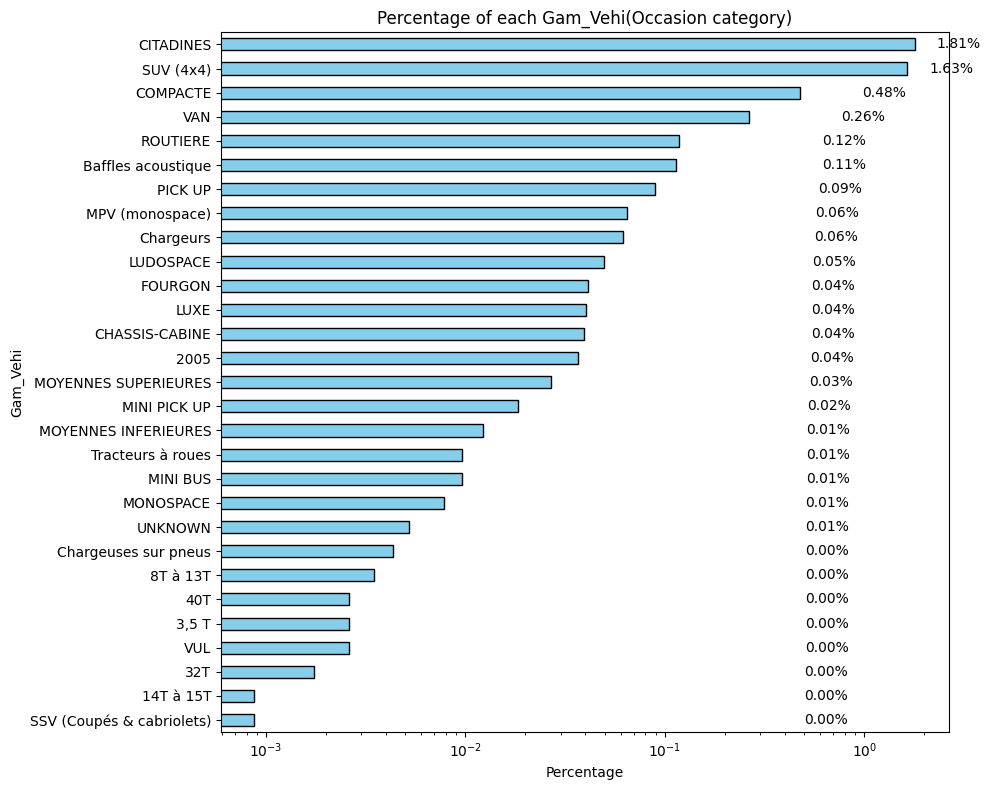

In [95]:
plt.figure(figsize=(10, 8))
ax = gam_percentagess.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Gam_Vehi')
plt.title('Percentage of each Gam_Vehi(Occasion category)')
plt.xscale('log')  # Set the x-axis scale to logarithmic

# Annotate each bar with its corresponding percentage
for i, v in enumerate(gam_percentagess.sort_values()):
    ax.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

Mrq_vehi by category

In [ ]:
new_df3 = subset_df[subset_df['NewOccas'] == 'Neuf']
# Count the occurrences of each unique value in 'famille_Vehi'
mrq_counts = new_df3['Mrq_Vehi'].value_counts()
mrq_counts

Mrq_Vehi
FORD                         32535
OPEL                         26779
NISSAN                       20866
DFSK                         12713
MITSUBISHI                    9727
MITSUBISHI FUSO               4465
FUSO                          2815
NEWHOLLAND                    1587
GAZ                            789
FIAT                           509
FIAT PROFESSIONAL              454
FOTON                          446
CHERY                          431
CASE                           139
JEEP                           127
HAOJUE                         112
CUMMINS POWER GENERATION        63
ALFA ROMEO                      44
DONGFENG                        44
MASERATI                        33
FPT                              8
CUMMINS ENGINE                   5
AMMANN                           5
SANY                             5
ABARTH                           4
BELAZ                            3
TEMSA                            3
MAGNI TELESCOPIC HANDLERS        3
XGJAO      

In [ ]:
total_count3 =mrq_counts.sum()
mrq_percentages = (mrq_counts / total_count3) * 100
mrq_percentages

Mrq_Vehi
FORD                         28.359120
OPEL                         23.341905
NISSAN                       18.187840
DFSK                         11.081281
MITSUBISHI                    8.478536
MITSUBISHI FUSO               3.891915
FUSO                          2.453694
NEWHOLLAND                    1.383308
GAZ                           0.687732
FIAT                          0.443670
FIAT PROFESSIONAL             0.395729
FOTON                         0.388756
CHERY                         0.375681
CASE                          0.121159
JEEP                          0.110699
HAOJUE                        0.097625
CUMMINS POWER GENERATION      0.054914
ALFA ROMEO                    0.038353
DONGFENG                      0.038353
MASERATI                      0.028764
FPT                           0.006973
CUMMINS ENGINE                0.004358
AMMANN                        0.004358
SANY                          0.004358
ABARTH                        0.003487
BELAZ           

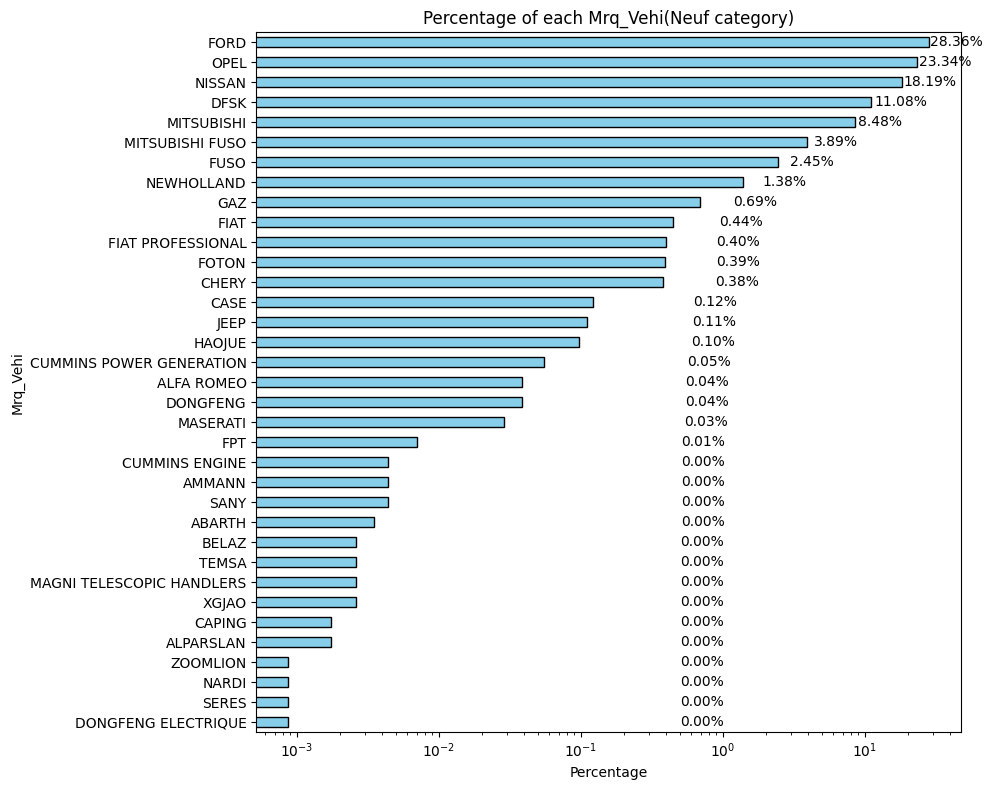

In [103]:
plt.figure(figsize=(10, 8))
ax = mrq_percentages.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Mrq_Vehi')
plt.title('Percentage of each Mrq_Vehi(Neuf category)')
plt.xscale('log')  # Set the x-axis scale to logarithmic

# Annotate each bar with its corresponding percentage
for i, v in enumerate(mrq_percentages.sort_values()):
    ax.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

In [100]:
new_df5 = subset_df[subset_df['NewOccas'] == 'Occasion']
# Count the occurrences of each unique value in 'famille_Vehi'
mrq_countss = new_df5['Mrq_Vehi'].value_counts()
mrq_countss

Mrq_Vehi
FORD               1725
NISSAN             1575
OPEL                954
RENAULT             183
DFSK                182
FIAT                175
DACIA               161
PEUGEOT             145
MITSUBISHI          128
VOLKSWAGEN           64
DONGFENG             56
CITROEN              49
HYUNDAI              36
BMW                  24
SKODA                24
JEEP                 23
AUDI                 23
MERCEDES             20
TOYOTA               19
HAOJUE               18
KIA                  17
NEWHOLLAND           11
ALFA ROMEO            8
LAND                  6
SEAT                  6
FOTON                 5
VOLVO                 5
RENEAULT              5
MITSUBISHI FUSO       4
GAZ                   3
JAGUAR                2
SUZUKI                2
HONDA                 2
CHEVROLET             2
CHERY                 2
CAZ                   2
TATA                  1
SSANGYONG             1
PORCHE                1
MASERATI              1
Name: count, dtype: int64

In [101]:
total_count5 =mrq_countss.sum()
mrq_percentages5 = (mrq_counts / total_count5) * 100
mrq_percentages5

Mrq_Vehi
FORD                         573.809524
OPEL                         472.292769
NISSAN                       368.007055
DFSK                         224.215168
MITSUBISHI                   171.552028
MITSUBISHI FUSO               78.747795
FUSO                          49.647266
NEWHOLLAND                    27.989418
GAZ                           13.915344
FIAT                           8.977072
FIAT PROFESSIONAL              8.007055
FOTON                          7.865961
CHERY                          7.601411
CASE                           2.451499
JEEP                           2.239859
HAOJUE                         1.975309
CUMMINS POWER GENERATION       1.111111
ALFA ROMEO                     0.776014
DONGFENG                       0.776014
MASERATI                       0.582011
FPT                            0.141093
CUMMINS ENGINE                 0.088183
AMMANN                         0.088183
SANY                           0.088183
ABARTH                         

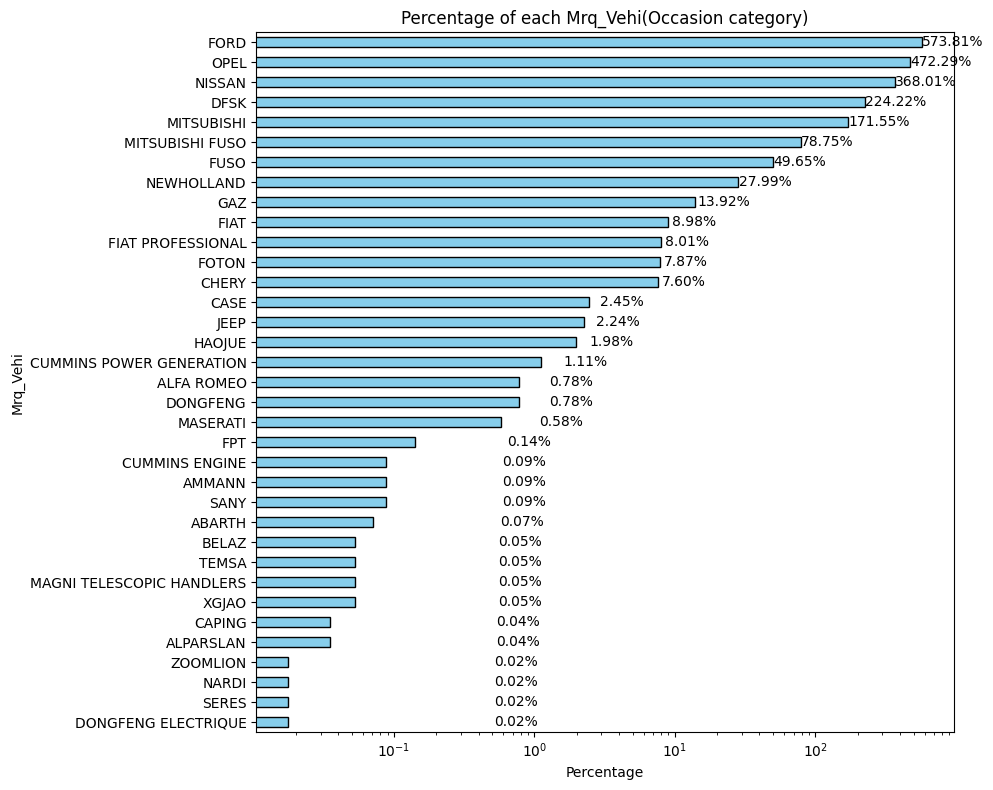

In [102]:
plt.figure(figsize=(10, 8))
ax = mrq_percentages5.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Mrq_Vehi')
plt.title('Percentage of each Mrq_Vehi(Occasion category)')
plt.xscale('log')  # Set the x-axis scale to logarithmic

# Annotate each bar with its corresponding percentage
for i, v in enumerate(mrq_percentages5.sort_values()):
    ax.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

Most frequent color by each famille_Vehi, Gam_Vehi, Mrq_Vehi

In [ ]:
most_frequent_color_per_category = subset_df.groupby(['NewOccas','famille_Vehi', 'Gam_Vehi','Mrq_Vehi'])['Couleur'].apply(lambda x: x.mode().iloc[0])

# Display the result
most_frequent_color_per_category

NewOccas  famille_Vehi             Gam_Vehi              Mrq_Vehi  
Neuf      AUTOCAR                  MOINS DE 40 PLACES    TEMSA             UNKNOWN
          Divers Matériel TP       Brise roche           CASE                NOIRE
                                   GODET                 CASE                JAUNE
          EQUIPEMENT INDUSTRIEL    GROUPES ELECTROGENES  FPT               UNKNOWN
          Equipements industriels  ACCESSOIRES GE        CAPING            UNKNOWN
                                                                          ...     
Occasion  VUL                      PICK UP               NISSAN        Gris Squale
                                                         VOLKSWAGEN        UNKNOWN
                                   VAN                   DACIA             UNKNOWN
                                                         FORD                BLANC
                                                         RENAULT           UNKNOWN
Name: Couleur, Leng

In [ ]:
subset_df

,CUSTNO,IDFactMat,DateFact,PRIXTTC,CITY,NewOccas,famille_Vehi,Gam_Vehi,Mrq_Vehi,Couleur,TypeFinancement
0,31000822,5726,2018-02-23,340000.008,OUARZAZATE,Neuf,VP,SUV (4x4),MITSUBISHI,"White pearl ""W54""",COMPTANT
1,31000822,5727,2018-02-23,340000.008,OUARZAZATE,Neuf,VP,SUV (4x4),MITSUBISHI,"White pearl ""W54""",COMPTANT
2,31000822,14344,2018-04-27,294999.996,OUARZAZATE,Neuf,VUL,PICK UP,MITSUBISHI,"White pearl ""W54""",COMPTANT
3,40000455,39533,2018-11-23,164000.004,BERKANE,Neuf,VP,CITADINES,FORD,CHROME COPPER,Crédit Classique
4,12015740,106877,2020-02-28,229000.008,UNKNOWN,Neuf,VP,SUV (4x4),OPEL,Blanc glacier GAZ,COMPTANT
...,...,...,...,...,...,...,...,...,...,...,...
120390,32005024,24091,2018-07-11,89000.004,LAAYOUNE,Neuf,VUL,MINI PICK UP,DFSK,UNKNOWN,Crédit Classique
120391,26000776,7528,2018-03-09,190700.000,SAFI,Neuf,VUL,PICK UP,MITSUBISHI,Titanium Gray,Crédit Classique
120392,26000776,7533,2018-03-09,495000.000,SAFI,Neuf,Poids lourds FUSO,14T à 15T,MITSUBISHI FUSO,Z2835 - Blanc Mitsubishi,Crédit Classique
120393,26000776,7557,2018-03-09,204000.000,SAFI,Neuf,VUL,PICK UP,MITSUBISHI,Titanium Gray,Crédit Classique


Most frequent  famille_Vehi, Gam_Vehi, Mrq_Vehi by CIVILITY_GROUP

In [ ]:
grouped = dfp.groupby('CIVILITY_GROUP')[['famille_Vehi', 'Gam_Vehi', 'Mrq_Vehi','Model_Vehi']]

# Calculate the most frequent values for each group
most_frequent_values = grouped.apply(lambda x: x.mode().iloc[0])

# Display the most frequent values for each 'CIVILITY_GROUP'
most_frequent_values

,famille_Vehi,Gam_Vehi,Mrq_Vehi,Model_Vehi
CIVILITY_GROUP,,,,
Companies and Organizations,VP,SUV (4x4),FORD,NEW QASHQAI MC
Individual,VP,SUV (4x4),OPEL,NEW QASHQAI MC
Other Categories,VP,SUV (4x4),FORD,TRANSIT


In [ ]:
grouped_stats = dfp.groupby('CIVILITY_GROUP')['PRIXTTC'].agg(['min', 'max', 'mean'])

grouped_stats

,min,max,mean
CIVILITY_GROUP,,,
Companies and Organizations,0.000,3.600000e+06,229930.937636
Individual,3500.002,1.293424e+06,192668.544175
Other Categories,0.000,2.244000e+07,254427.667283


# Convert to CSV

In [ ]:
dfp.to_csv('C:/Users/israe/OneDrive/Desktop/stage/cleaned_product_data.csv', index=False)
